In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

from nn_trainer import NNTrainer

from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
PATH_TO_DATA = 'data'

In [4]:
full_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'housing.csv'))

## Dataset preparation

This step shows a minimalistic loading and processing pipeline of the `MNIST` dataset.

In [5]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'final_train_ds.csv'))
print(train_df.shape)
train_df.head()

(15480, 26)


,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,age_clipped,median_house_value,longitude,latitude,housing_median_age,total_rooms,...,population_log,total_bedrooms_log,total_rooms_log,distance_to_SF,distance_to_LA,1/distance_to_SF,1/distance_to_LA,log_distance_to_SF,log_distance_to_LA,bedroom/rooms
0,False,False,False,False,False,248200.0,0.609553,-0.633700,0.105068,0.267195,...,0.564075,0.260427,0.593930,0.594737,-0.993357,-0.220070,0.293305,0.672435,-1.128013,-0.911534
1,False,False,False,False,False,187900.0,0.559735,-0.558979,-1.003622,4.990733,...,2.498532,2.484381,2.502352,0.522846,-0.915681,-0.219115,-0.040686,0.630292,-0.935963,-0.353076
2,False,False,False,False,False,295500.0,0.893517,-0.909234,-1.003622,0.353398,...,0.460031,0.227824,0.669097,0.921515,-0.854024,-0.223714,-0.154210,0.850102,-0.800596,-1.122943
3,False,False,False,False,False,175000.0,0.624499,-0.722431,-0.132509,-1.125025,...,-1.658982,-2.012828,-3.046265,0.653895,-1.062084,-0.220810,1.803470,0.706231,-1.323701,4.382670
4,False,False,True,False,False,169600.0,-1.308445,1.005496,0.896989,-0.731088,...,-0.710034,-0.696222,-0.887709,-1.462103,1.152951,0.421744,-0.453060,-1.756723,1.121867,0.500505


In [6]:

test_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'final_test_ds.csv'))
print(test_df.shape)
test_df.head()

(5160, 26)


,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,age_clipped,median_house_value,longitude,latitude,housing_median_age,total_rooms,...,population_log,total_bedrooms_log,total_rooms_log,distance_to_SF,distance_to_LA,1/distance_to_SF,1/distance_to_LA,log_distance_to_SF,log_distance_to_LA,bedroom/rooms
0,False,False,False,False,False,238800.0,-1.129099,0.748642,-0.370085,2.481122,...,1.735792,1.527195,1.810945,-1.234743,0.889603,-0.060341,-0.448252,-1.194064,0.978939,-0.888829
1,True,False,False,False,False,108800.0,1.052935,-0.717761,-1.716352,-0.407132,...,-0.074206,0.148613,-0.211315,0.917958,-0.772674,-0.223680,-0.238090,0.848279,-0.640258,0.972822
2,True,False,False,False,False,72700.0,-0.566154,0.818693,0.896989,-0.907201,...,-0.488293,-1.341681,-1.480309,-0.849448,0.618533,-0.163285,-0.441761,-0.560282,0.814415,0.393340
3,False,False,False,True,False,500001.0,0.589626,-0.848523,0.105068,0.368692,...,0.416976,1.062383,0.682002,0.707420,-0.983821,-0.221446,0.227769,0.736154,-1.102938,0.946990
4,False,False,False,True,False,399200.0,0.395336,-0.689741,-1.557968,12.869011,...,3.323073,3.124321,3.596744,0.500945,-0.871126,-0.218810,-0.128914,0.617209,-0.836826,-1.342553


In [7]:
# Main function

trainer = NNTrainer(train_df, test_df)

In [8]:
%% time
num_epochs = 200
hist, history_not_n = trainer.fit(num_epochs)

################################  0  ################################
Total loss (MSE):  0.0713
Total loss not normalized (RMSE):  129516.9453
Total loss (MSE):  0.0681
Total loss not normalized (RMSE):  126524.375
Total loss (MSE):  0.0419
Total loss not normalized (RMSE):  99271.4453
Total loss (MSE):  0.0439
Total loss not normalized (RMSE):  101630.8594
Total loss (MSE):  0.0339
Total loss not normalized (RMSE):  89302.7578
Total loss (MSE):  0.0228
Total loss not normalized (RMSE):  73297.5625
Total loss (MSE):  0.0207
Total loss not normalized (RMSE):  69711.2969
Total loss (MSE):  0.0327
Total loss not normalized (RMSE):  87729.9141
Total loss (MSE):  0.0249
Total loss not normalized (RMSE):  76579.75
Total loss (MSE):  0.0336
Total loss not normalized (RMSE):  88849.0234
Total loss (MSE):  0.0203
Total loss not normalized (RMSE):  69130.4297
Total loss (MSE):  0.018
Total loss not normalized (RMSE):  65083.2148
Total loss (MSE):  0.0202
Total loss not normalized (RMSE):  68961.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


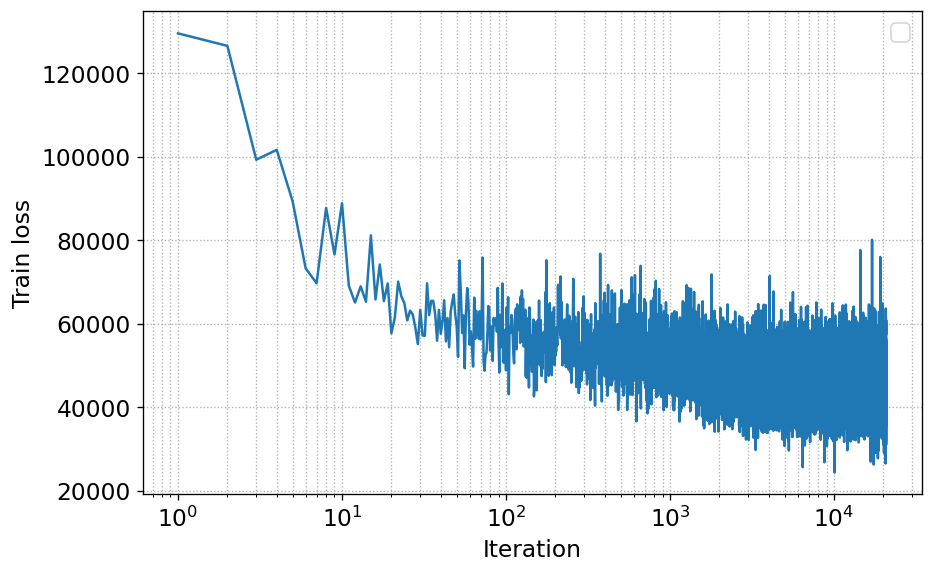

In [9]:
loss_nn = trainer.plot_loss_function(history_not_n, label='RMSE')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


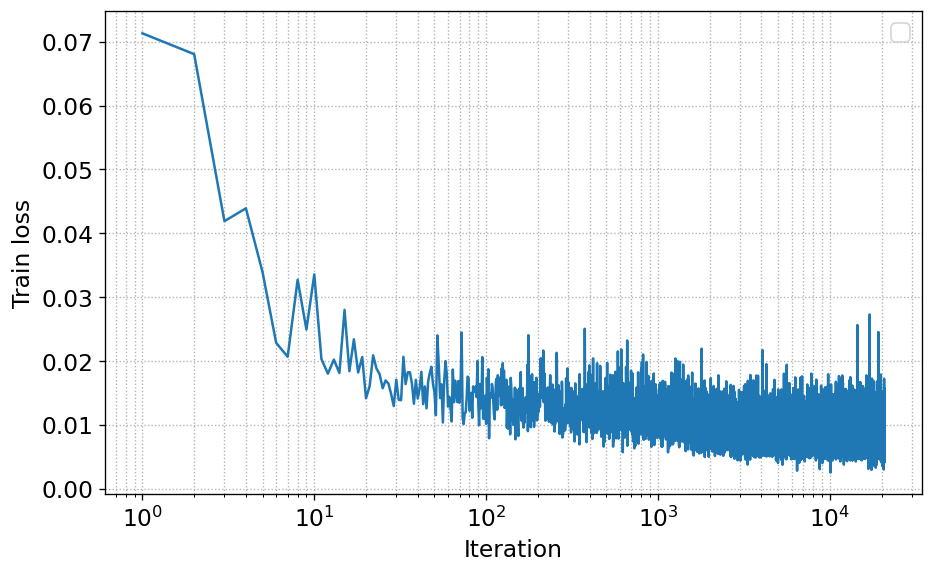

In [10]:
fig_loss = trainer.plot_loss_function(hist)

In [11]:
fig_loss.savefig('loss.pdf')

In [12]:
trainer.test_model()

Normalized values
Mean Squared Error (MSE): 0.0115
Root Mean Squared Error (RMSE): 0.1071
Mean Absolute Error (MAE): 0.0697
R-squared (R2): 0.7949 

Unnormalized values
Mean Squared Error (MSE): 2698856223.25
Root Mean Squared Error (RMSE): 51950.52
Mean Absolute Error (MAE): 33781.57
R-squared (R2): 0.7949
